In [30]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

In [31]:
df = pd.read_csv('ai4i2020.csv')

In [32]:
df.head(15)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [3]:
df.drop(['Product ID', 'UDI'], axis=1, inplace = True)

In [4]:
df['Type'].replace('L', 0, inplace=True)
df['Type'].replace('M', 1, inplace=True)
df['Type'].replace('H', 2, inplace=True)

In [5]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,2,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,1,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,2,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [7]:
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.2), max_features=1.0)

In [8]:
model.fit(df[['Machine failure']])

/Users/vrajshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.2)

In [12]:
df['anomaly_score'] = model.decision_function(df[['Machine failure']])
df['anomaly'] = model.predict(df[['Machine failure']])
df.head(55)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,anomaly_score,anomaly
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0.00000,1
1,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0.00000,1
2,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0.00000,1
3,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0.00000,1
4,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0.00000,1
5,1,298.1,308.6,1425,41.9,11,0,0,0,0,0,0,0.00000,1
6,0,298.1,308.6,1558,42.4,14,0,0,0,0,0,0,0.00000,1
7,0,298.1,308.6,1527,40.2,16,0,0,0,0,0,0,0.00000,1
8,1,298.3,308.7,1667,28.6,18,0,0,0,0,0,0,0.00000,1
9,1,298.5,309.0,1741,28.0,21,0,0,0,0,0,0,0.00000,1


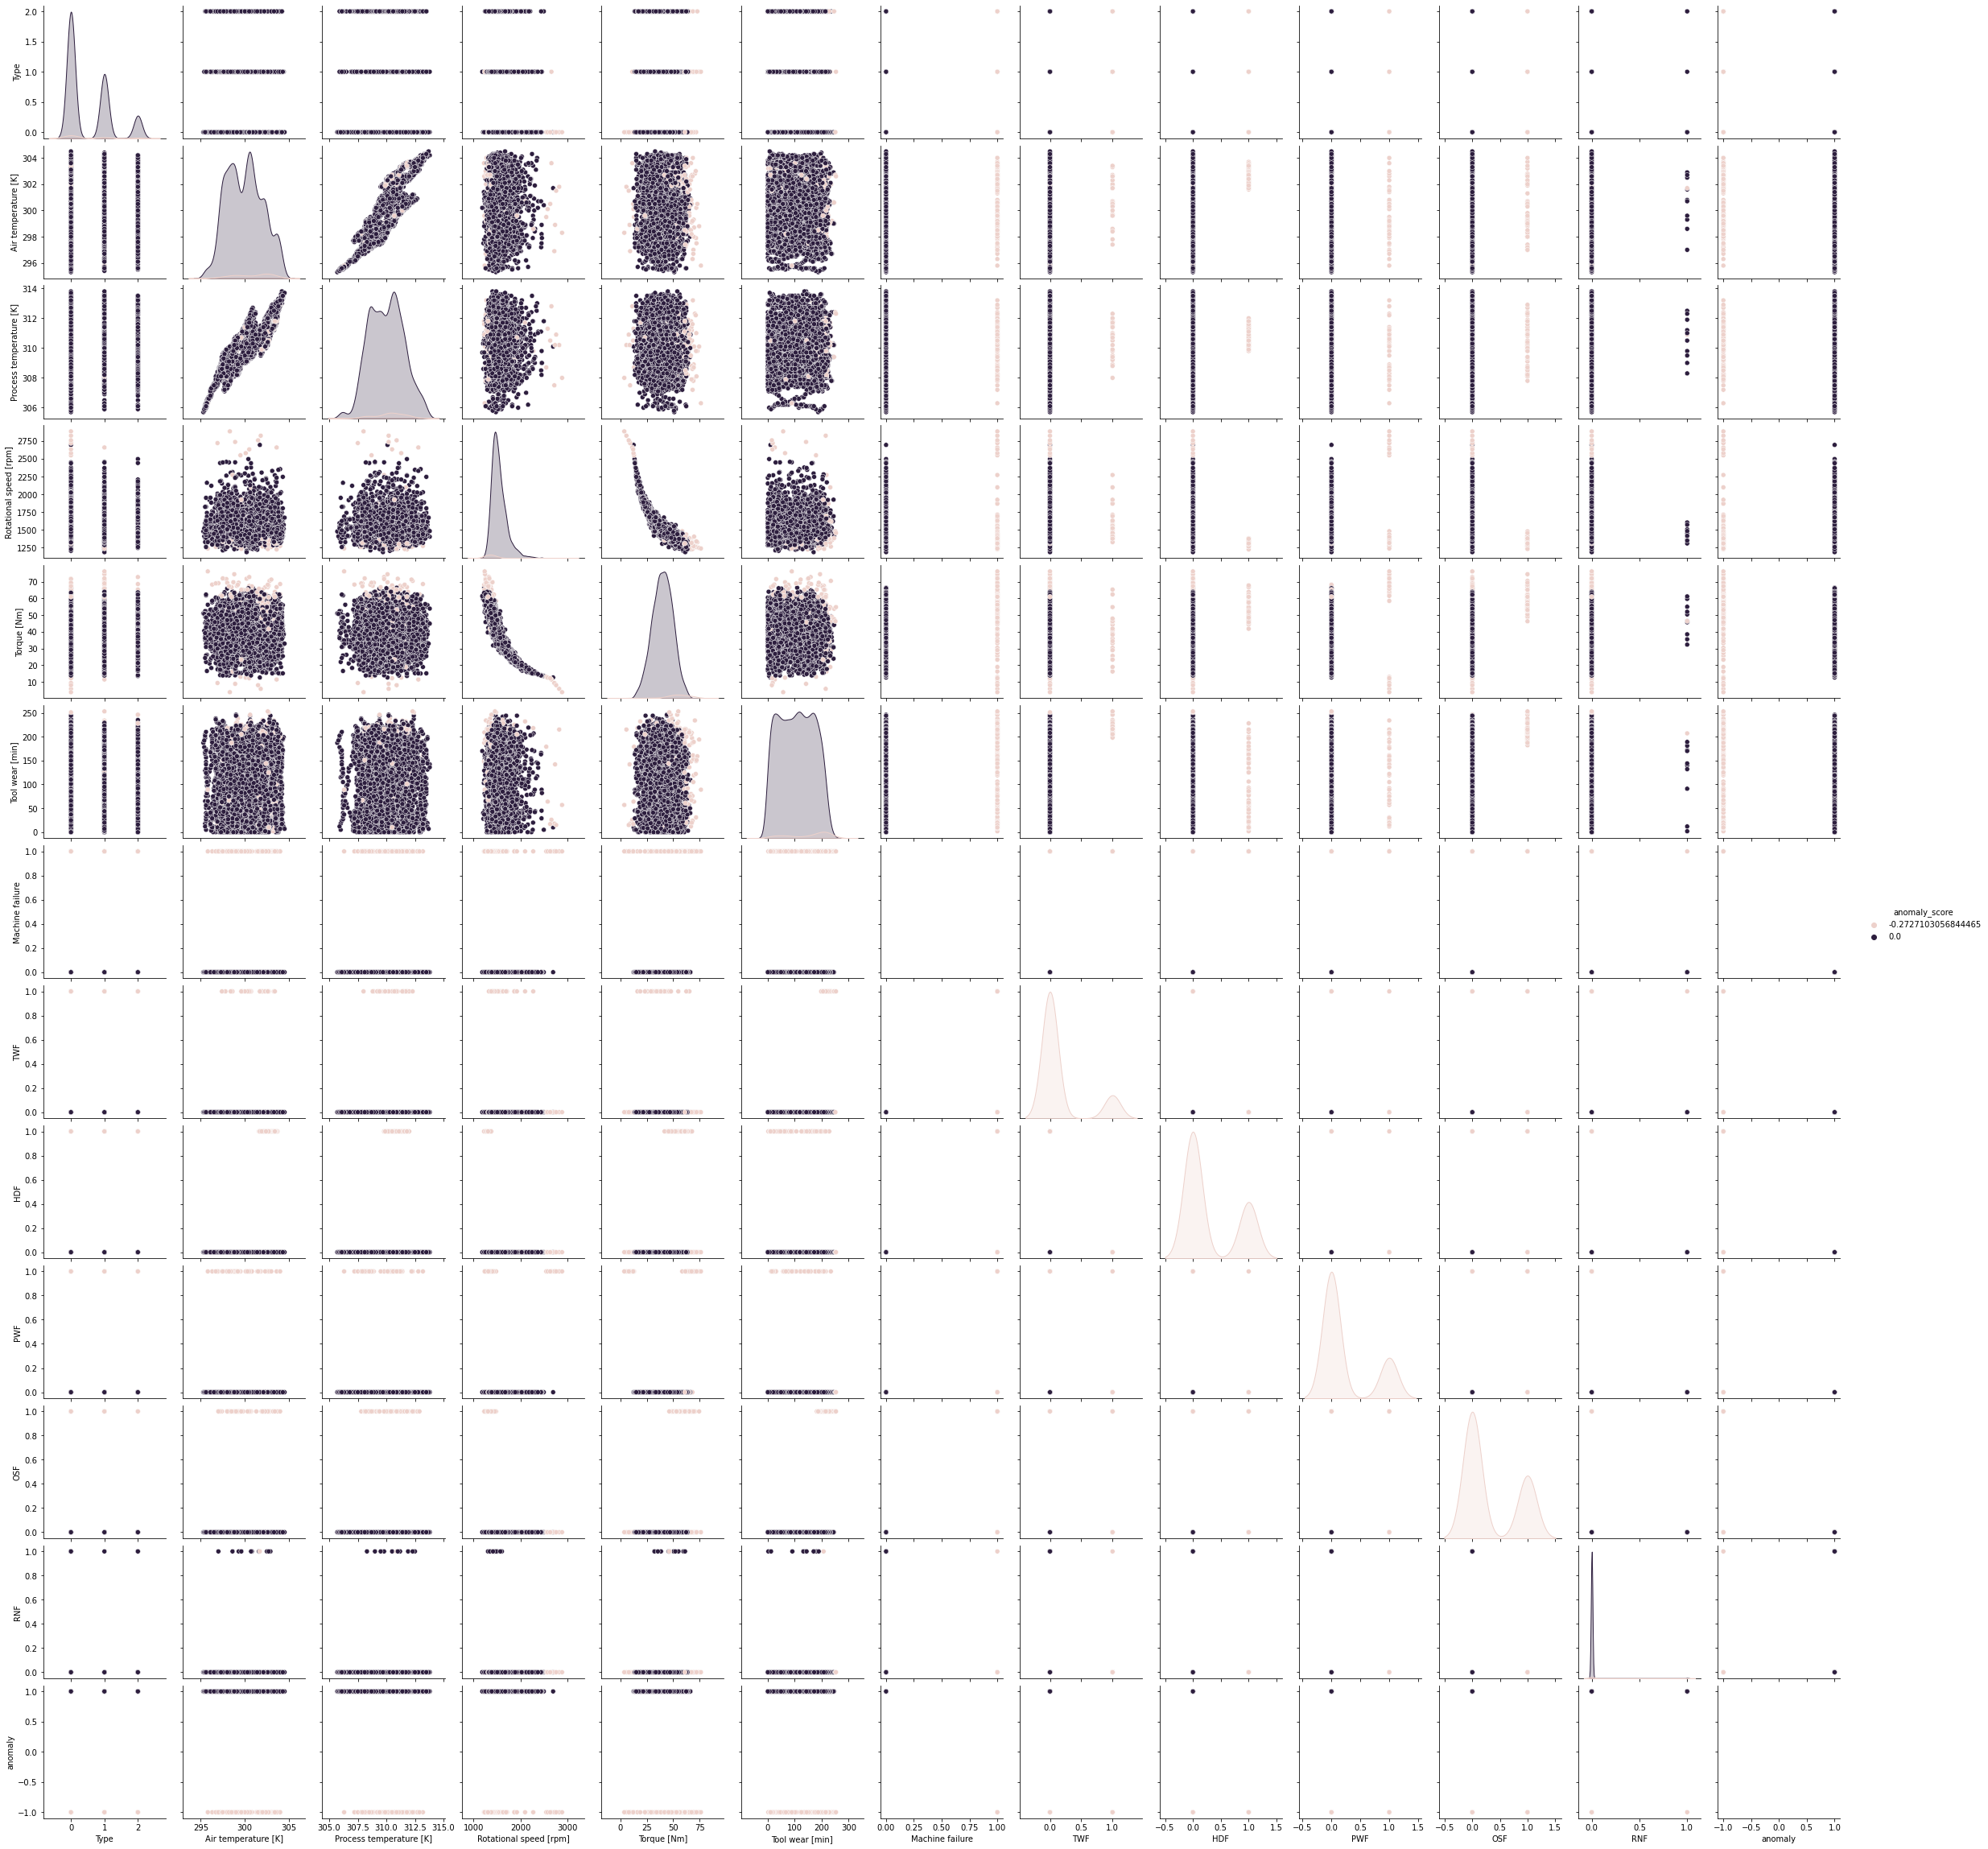

In [13]:
import seaborn as sns
sns.pairplot(df.sample(frac=0.5), hue='anomaly_score')

In [27]:
#from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
#import time

